## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
le=LabelEncoder()
df=pd.read_csv('data/dataset.csv')
df = df[df['genre'].notnull()]
df.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,...,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.3600,...,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,jazz
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.0385,...,0.1420,0.685,128.336,157293,4,43.36534,9,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,0.520,0.411,9,-12.411,1,0.0315,0.7860,...,0.1460,0.350,120.290,207573,4,37.54527,9,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,0.746,0.666,2,-10.408,1,0.1460,0.5430,...,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,country


## Encoding the data

In [12]:

data_encoded=df[["danceability","energy","key","loudness","mode",
                                 "speechiness","instrumentalness","acousticness","liveness","valence","tempo",
                                 "duration_ms","chorus_hit","decade","genre"]].copy()
data_encoded['n_decade']=le.fit_transform(data_encoded['decade'])
data_encoded['n_genre']=le.fit_transform(data_encoded['genre'])
data_encoded=data_encoded.drop(['genre','decade'],axis=1)
#data_encoded.head(5)

## Splitting the dataset into train and test sets

In [13]:
trainX,testX,trainY,testY=train_test_split(data_encoded.drop('n_genre',axis=1),
                                           data_encoded[['n_genre']])
trainX.head(5)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,n_decade
25254,0.469,0.386,2,-12.112,1,0.0272,0.000012,0.103000,0.291,0.383,102.476,207467,48.28904,5
30392,0.578,0.937,5,-3.926,1,0.0724,0.000002,0.000963,0.400,0.769,137.937,239827,30.89397,0
7291,0.295,0.425,4,-10.987,1,0.0426,0.000026,0.857000,0.636,0.644,87.732,197493,24.32133,2
11475,0.495,0.307,9,-18.168,1,0.0403,0.000052,0.260000,0.103,0.802,80.970,183933,78.82135,3
5391,0.592,0.703,5,-9.672,0,0.2360,0.000000,0.257000,0.972,0.487,88.860,192640,36.56403,2


In [14]:
nb_model=GaussianNB()
nb_model.fit(trainX,trainY.squeeze())

GaussianNB()

In [15]:
nb_model_predict=nb_model.predict(testX)
result_nb=pd.DataFrame({'actual':testY.n_genre,'predicted':nb_model_predict})
result_nb.head(5)

,actual,predicted
32406,7,6
19054,1,6
28111,5,6
10382,7,6
24156,3,6


In [16]:
conf_matrix_nb=pd.crosstab(le.inverse_transform(result_nb['actual']),
                           le.inverse_transform(result_nb['predicted']),
                           rownames=['Actual'],
                           colnames=['Predicted'])
#conf_matrix=pd.crosstab(le.inverse_transform(result_entropy['actual']),le.inverse_transform(result_entropy['predicted']))
#conf_matrix_nb
np.unique(result_nb['predicted'])

array([1, 2, 3, 4, 5, 6, 7, 8])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

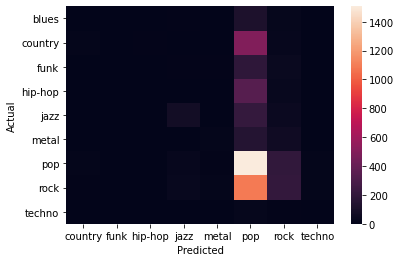

In [17]:
sns.heatmap(conf_matrix_nb)

In [18]:
accuracy_score(result_nb['actual'],result_nb['predicted'])

0.3580854835532795